In [13]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import fftpack
import imageio as iio
from scipy.fftpack import dct, idct

In [14]:
def dct2(a):
    return dct( dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct( idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [15]:
def COLOR_BGR2YCrCb(img):
    img = img.astype('float32')
    B_channel, G_channel, R_channel = cv2.split(img)
    Y_channel = 0.299 * R_channel +  0.587 * G_channel + 0.114 * B_channel
    Cb_channel = 0.5 * R_channel -  0.419 * G_channel - 0.081 * B_channel + 128
    Cr_channel = -0.1687 * R_channel - 0.3313 * G_channel +   0.5 * B_channel + 128
    return cv2.merge([Y_channel, Cr_channel, Cb_channel])

def YCrCb2BGR(img):
    img = img.astype('float32')
    Y_channel, Cr_channel, Cb_channel = cv2.split(img)
    B_channel = Y_channel + 1.40200(Cr_channel - 128)
    G_channel = Y_channel - 0.34414(Cb_channel - 128) - 0.71414(Cr_channel - 128)
    R_channel = Y_channel + 1.77200(Cb_channel - 128)
    return cv2.merge([B_channel, G_channel, R_channel])
	

<>:12: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:13: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:13: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:14: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:12: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:13: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:13: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:14: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
C:\Users\CGC\AppData\Local\Temp\ipykernel_65472\2482341129.py:12: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  B_channel = Y_channel + 1.40200(Cr_channel - 128)
C:\Users\CGC\AppData\Local\Temp\ipykernel_65472\2482341129.py:13: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  G_channe

(512, 512)
float64
245.0


C:\Users\CGC\AppData\Local\Temp\ipykernel_65472\4220750526.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = iio.imread("img/Lenna_gray.bmp")


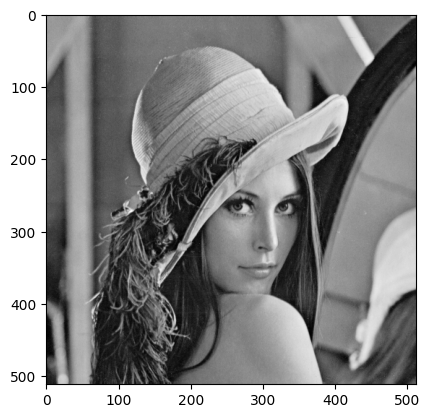

In [16]:
im = iio.imread("img/Lenna_gray.bmp")
# im = iio.imread("./img/Lenna_gray.bmp")
im = im.astype(float)
print(im.shape)
print(im.dtype) 
print(np.max(im))
plt.figure()
plt.imshow(im,cmap='gray')

In [17]:
imsize = im.shape # 512 512
dctcoef = np.zeros(imsize)
# 构建 8*8 子图 ＆ 处理
for i in r_[0:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        
        subgraph = im[i:(i+8),j:(j+8)] # 当前子图

        # 零偏置转换 
        subgraph = subgraph - 128

        # dct
        dctcoef[i:(i+8),j:(j+8)] = dct2(subgraph)
        
dctcoef

array([[ 2.60250000e+02,  5.08862729e+00,  3.00940760e+00, ...,
        -2.29974077e+00, -1.13898400e+01,  4.58071804e-02],
       [ 7.11017892e+00, -1.20290182e+00,  7.84973318e-01, ...,
        -5.87791889e+00, -5.22182661e+00, -4.81537954e+00],
       [-4.70826940e+00, -6.27095107e-03, -1.60355339e+00, ...,
         2.48203914e+00,  1.25628157e+00,  3.23060879e+00],
       ...,
       [ 3.02230274e+00,  5.62267415e-01,  3.35568463e+00, ...,
         4.59527814e-01, -1.00215164e+00, -1.76994859e+00],
       [-7.76973686e-01, -2.08298551e+00, -9.02728176e-01, ...,
        -4.09898191e+00,  2.09314575e+00,  2.01260316e+00],
       [ 2.10875092e+00, -4.73877888e-01, -2.62803416e+00, ...,
        -4.61146457e+00,  1.77162914e+00,  1.82609619e+00]])

In [18]:
# Threshold
thresh = 0.012
dct_thresh = dctcoef * (abs(dctcoef) > (thresh*np.max(dctcoef)))
percent_nonzeros = np.sum(dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)
# dct_thresh = dctcoef

In [19]:
# 量化
# 亮度量化模板
Qy = np.array([ [16,  11,  10,  16,  24,  40,  51,  61],
                [12,  12,  14,  19,  26,  58,  60,  55],
                [14,  13,  16,  24,  40,  57,  69,  56],
                [14,  17,  22,  29,  51,  87,  80,  62],
                [18,  22,  37,  56,  68, 109, 103,  77],
                [24,  35,  55,  64,  81, 104, 113,  92],
                [49,  64,  78,  87, 103, 121, 120, 101],
                [72,  92,  95,  98, 112, 100, 103,  99]], dtype=int)

# 颜色量化模板
Qc = np.array([ [17,  18,  24,  47,  99,  99,  99,  99],
                [18,  21,  26,  66,  99,  99,  99,  99],
                [24,  26,  56,  99,  99,  99,  99,  99],
                [47,  66,  99,  99,  99,  99,  99,  99],
                [99,  99,  99,  99,  99,  99,  99,  99],
                [99,  99,  99,  99,  99,  99,  99,  99],
                [99,  99,  99,  99,  99,  99,  99,  99],
                [99,  99,  99,  99,  99,  99,  99,  99]], dtype=int)

# z 字变换矩阵
Z = np.array([[0,  1,  5,  6,  14,  5, 27, 28],
              [2,  4,  7,  13, 16, 26, 29, 42],
              [3,  8,  12, 17, 25, 30, 41, 43],
              [9,  11, 18, 24, 31, 40, 44, 53],
              [10, 19, 23, 32, 39, 45, 52, 54],
              [20, 22, 33, 38, 46, 51, 55, 60],
              [21, 34, 37, 47, 50, 56, 59, 61],
              [35, 36, 48, 49, 57, 58, 62, 63]], dtype=int)

In [20]:
dctcoef_q = np.zeros((4096, 64)) # 每个子图展开后储存在一行中
rows = 4096
cols = 64
rol = 0
dctcoef_q = [[0 for _ in range(cols)] for _ in range(rows)]
dctcoef_dc = [[0 for _ in range(cols)] for _ in range(rows)]
block_num = 0

for i in r_[0:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        # 子图
        subgraph = dct_thresh[i:(i+8),j:(j+8)]
        
        # 量化
        dctcoef_quantized = np.round(subgraph / Qy) # 8 * 8

        # 对每一个子图 z 字重排
        # print(rol)
        for a in range(0, 8):
            for b in range(0, 8):
                dctcoef_q[rol][Z[a][b]] = dctcoef_quantized[a][b]

        # 符号编码
        # 全零结尾用 a 截断
        for c in range(64-1, -1, -1):
            if dctcoef_q[rol][c] != 0:
                # dctcoef_q[rol][c + 1] = 'a'
                # dctcoef_q[rol] = dctcoef_q[rol][: c + 2]
                dctcoef_q[rol] = dctcoef_q[rol][: c + 1]
                break
        
        # dc 编码
        # if block_num == 0:
        #     dctcoef_dc[rol][block_num] = dctcoef_q[rol][0]
        # else:
        #     dctcoef_dc[rol][block_num] = dctcoef_dc[rol][block_num] - dctcoef_dc[rol][block_num-1]
        
        rol += 1 # 下一行

for i in range(4096):
    print(dctcoef_q[i])

[16.0]
[15.0, 2.0, 1.0]
[14.0, 0.0, 1.0]
[13.0]
[16.0, -3.0]
[21.0, -2.0]
[20.0, 3.0]
[2.0, 11.0, 1.0, -0.0, 0.0, 0.0, -0.0, -1.0, -0.0, -0.0, 0.0, 0.0, 0.0, -1.0, -1.0]
[-17.0, -0.0, 1.0]
[-12.0, -2.0]
[-11.0, -0.0, 1.0]
[-11.0, -0.0, 1.0]
[-11.0]
[-7.0, -3.0]
[-3.0, -1.0]
[-1.0]
[1.0]
[2.0, 1.0]
[1.0]
[2.0, -1.0]
[3.0, -1.0]
[3.0]
[2.0]
[2.0]
[3.0]
[3.0]
[3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 1.0]
[1.0]
[2.0]
[2.0]
[3.0]
[2.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -1.0]
[2.0, 2.0]
[1.0]
[1.0, -1.0]
[0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0]
[0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -

In [21]:
with open('t.txt', 'w') as file:
    for i in range(4096):
        row_str = ' '.join(map(str, dctcoef_q[i]))
        # 将每一行写入文件
        file.write(row_str + '\n')


In [22]:
# dctcoef_q 每行 为一个子图的排序
# from tqdm import tqdm
# # 添加数据到一维数组
# new_data = 42
# dct_flatten = np.empty(0)
# for r in tqdm(range(4096)):
#     for l in range(len(dctcoef_q[r])):
#         dct_flatten = np.append(dct_flatten, dctcoef_q[r][l])
# # print(len(dctcoef_q[-2]))
# dct_flatten

In [23]:
np.savez('outputs/img', data=dctcoef_q)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/img.npz'

In [ ]:
loaded_data = np.load('outputs/img.npz', allow_pickle=True)
dctcoef_q = loaded_data['data']
dctcoef_q

array([list([16.0, 'a']), list([15.0, 2.0, 1.0, 'a']),
       list([14.0, 0.0, 1.0, 'a']), ...,
       list([-36.0, 5.0, 4.0, 1.0, 2.0, -0.0, 0.0, -0.0, 1.0, 'a']),
       list([-35.0, -5.0, -2.0, 1.0, 2.0, -0.0, -1.0, 0.0, -1.0, 'a']),
       list([-20.0, -6.0, -7.0, -0.0, -2.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 1.0, 'a'])],
      dtype=object)

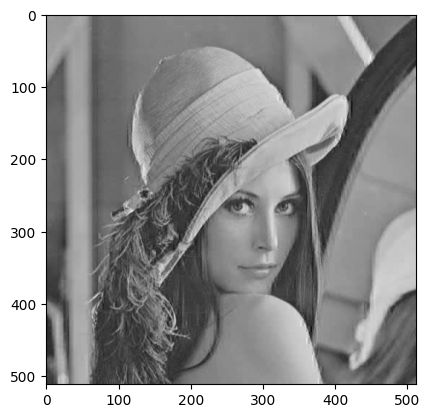

In [ ]:
import numpy as np
from core.dct import dct2, idct2
from utils.matrix import Qy, Qc, Z
import matplotlib.pyplot as plt

loaded_data = np.load('outputs/img.npz', allow_pickle=True)
dctcoef_q = loaded_data['data']
# print(dctcoef_q)
# decoder
decoded_blocks = []
imsize = (512, 512)
rows = 4096
cols = 64
rol = 0
dctcoef_input = dctcoef_q
for row in range(rows):
    dctcoef_input[row] = dctcoef_input[row][:-1] + [0] * (64 - len(dctcoef_input[row]) + 1)

# Decoding process
for i in range(0, rows):
    decoded_block = np.zeros((8, 8))

    # Reverse zigzag scan
    for a in range(0, 8):
        for b in range(0, 8):
            decoded_block[a][b] = dctcoef_input[i][Z[a][b]]

    # Dequantization
    decoded_block = decoded_block * Qy

    # Inverse DCT
    decoded_block = idct2(decoded_block)

    decoded_blocks.append(decoded_block + 128)

# Reshape the decoded blocks into the original image size
decoded_image = np.zeros((imsize[0], imsize[1]))

for i, block_num in enumerate(range(0, rows)):
    row_start = (block_num * 8) // imsize[1] * 8
    col_start = (block_num * 8) % imsize[1]
    decoded_image[row_start:row_start + 8, col_start:col_start + 8] = decoded_blocks[i]

plt.figure()
plt.imshow(decoded_image,cmap='gray')

In [ ]:
from PIL import Image
image_pil = Image.fromarray((decoded_image).astype(np.uint8))
image_pil.save('img.bmp')

In [ ]:
fig = plt.gcf()
plt.savefig('image.bmp', format='bmp')

ValueError: Format 'bmp' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

<Figure size 640x480 with 0 Axes>

In [ ]:
# decoder
decoded_blocks = []

dctcoef_input = dctcoef_q
for row in range(rows):
    dctcoef_input[row] = dctcoef_input[row][:-1] + [0] * (64 - len(dctcoef_input[row]) + 1)

# Decoding process
for i in range(0, rows):
    decoded_block = np.zeros((8, 8))

    # Reverse zigzag scan
    for a in range(0, 8):
        for b in range(0, 8):
            decoded_block[a][b] = dctcoef_input[i][Z[a][b]]

    # Dequantization
    decoded_block = decoded_block * Qy

    # Inverse DCT
    decoded_block = idct2(decoded_block)

    decoded_blocks.append(decoded_block + 128)

# Reshape the decoded blocks into the original image size
decoded_image = np.zeros((imsize[0], imsize[1]))

for i, block_num in enumerate(range(0, rows)):
    row_start = (block_num * 8) // imsize[1] * 8
    col_start = (block_num * 8) % imsize[1]
    decoded_image[row_start:row_start + 8, col_start:col_start + 8] = decoded_blocks[i]

decoded_image

array([[160.        , 160.        , 160.        , ..., 171.62505304,
        163.39724763, 141.27790577],
       [160.        , 160.        , 160.        , ..., 164.95497914,
        157.14135757, 136.98499693],
       [160.        , 160.        , 160.        , ..., 164.41171497,
        157.6671839 , 140.76467294],
       ...,
       [ 46.91427778,  47.20462861,  47.74112699, ..., 101.4656172 ,
        102.59334575, 103.00929158],
       [ 46.32900681,  46.61935764,  47.15585603, ..., 103.4712522 ,
        106.48540369, 108.31102717],
       [ 46.01226044,  46.30261128,  46.83910966, ..., 104.36231758,
        108.78614672, 111.64957206]])

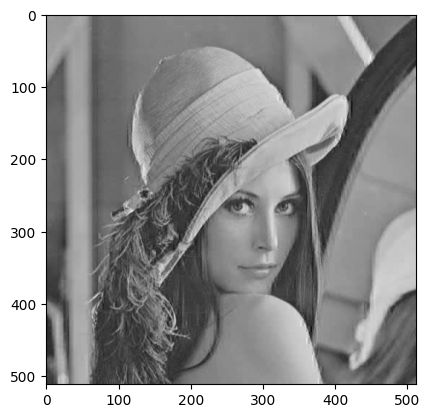

In [ ]:
plt.figure()
plt.imshow(decoded_image,cmap='gray')